# Figures

One can use the data in '.results/main/' to plot these figures in the main text.

In [1]:
import time
import numpy as np
import pandas as pd
import networkx as nx
from scipy.stats import norm, skewnorm, lognorm

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties

font = {'family': 'Arial'}
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Arial'
matplotlib.rcParams['mathtext.it'] = 'Arial'
matplotlib.rc('font', **font)

In [2]:
save_path = './figs/'

## Task environments

### Tasks of different complexity

In [3]:
def task(t, opt, power, peak):
    """
    Optimization test functions.
    """
    if opt == 'Ackley':   # Ackley function --> hard-to-easy task
        a = 20
        b = 12
        c = 2*peak*np.pi     # this contant is twice the number of peaks
        d = 22.30082734
        y = 1 - ((a*(1-np.exp(-b*np.sqrt((t-0.5)**2))) - np.exp(np.cos(c*(t-0.5))) + np.exp(1))/d) 
        return y**power
    elif opt == 'Rastrigin':   # Rastrigin function --> easy-to-hard task
        a = 1
        b = 10
        c = 2*peak*np.pi    # this contant is twice the number of peaks
        d = 4.5
        y = 1 - ((a + b*(t-0.5)**2 - a*np.cos(c*(t-0.5)))/d)
        return y**power

In [4]:
t = np.arange(0, 1.0001, 0.001)
h2e_c1 = task(t, opt='Ackley', power=1, peak=1)
h2e_c3 = task(t, opt='Ackley', power=1, peak=7)
h2e_c5 = task(t, opt='Ackley', power=1, peak=31)
e2h_c1 = task(t, opt='Rastrigin', power=1, peak=1)
e2h_c3 = task(t, opt='Rastrigin', power=1, peak=7)
e2h_c5 = task(t, opt='Rastrigin', power=1, peak=31)

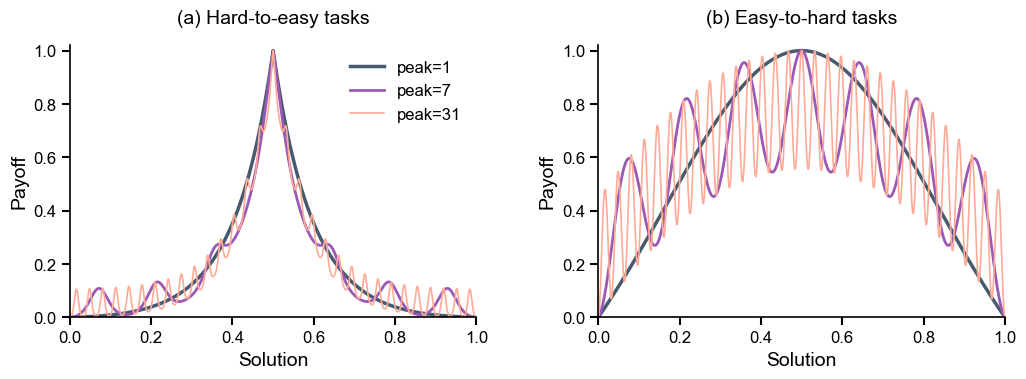

In [5]:
paras = {'font.size': 14, 'lines.linewidth': 1}
# sns.set(context='notebook', style='ticks', font='Arial', font_scale=1, rc=paras)
# ["#34495e" dark grey, "#9b59b6" blue, "#95a5a6" light grey, "#e74c3c" red, FFaa96 light green]

fig, axs = plt.subplots(1, 2, figsize=(11, 4), dpi=100)

p = 0
axs[p].plot(t, h2e_c1, color='#34495e', linewidth=2.5, alpha=0.9, label='peak=1')
axs[p].plot(t, h2e_c3, color='#9b59b6', linewidth=2, label='peak=7')
axs[p].plot(t, h2e_c5, color='#FFaa96', linewidth=1.2, label='peak=31')
# axs[p].vlines(x=1000, ymin=0, ymax=1, colors='grey', alpha=0.5, linestyles='solid', linewidths=1.5)
axs[p].set_xlabel('Solution', fontsize=14, color='k')
axs[p].set_ylabel('Payoff', fontsize=14, color='k')
axs[p].set_xlim(0, 1)
axs[p].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
axs[p].set_ylim(0, 1.02)
axs[p].set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
axs[p].spines['bottom'].set_linewidth('1.2')
axs[p].spines['left'].set_linewidth('1.2')
axs[p].spines['top'].set_visible(False)
axs[p].spines['right'].set_visible(False)
# axs[0].grid(True, linestyle='-.')
axs[p].tick_params(labelcolor='k', labelsize='large', width=1.5, length=6)
axs[p].set_title('(a) Hard-to-easy tasks', fontsize=14, y=1.05)
axs[p].legend(loc=1, fontsize='large', frameon=False)

p = 1
axs[p].plot(t, e2h_c1, color='#34495e', linewidth=2.5, alpha=0.9, label='peak=1')
axs[p].plot(t, e2h_c3, color='#9b59b6', linewidth=2, label='peak=7')
axs[p].plot(t, e2h_c5, color='#FFaa96', linewidth=1.2, label='peak=31')
# axs[p].vlines(x=1000, ymin=0, ymax=1, colors='grey', alpha=0.5, linestyles='solid', linewidths=1.5)
axs[p].set_xlabel('Solution', fontsize=14, color='k')
axs[p].set_ylabel('Payoff', fontsize=14, color='k')
axs[p].set_xlim(0, 1)
axs[p].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
axs[p].set_ylim(0, 1.02)
axs[p].set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
axs[p].spines['bottom'].set_linewidth('1.2')
axs[p].spines['left'].set_linewidth('1.2')
axs[p].spines['top'].set_visible(False)
axs[p].spines['right'].set_visible(False)
# axs[0].grid(True, linestyle='-.')
axs[p].tick_params(labelcolor='k', labelsize='large', width=1.5, length=6)
axs[p].set_title('(b) Easy-to-hard tasks', fontsize=14, y=1.05)
# axs[p].legend(loc=8, fontsize='large', frameon=False)

plt.subplots_adjust(left=0.1, right=0.95, bottom=0.2, wspace=0.3)
figname = save_path + '/main/Two_Tasks_Complexity.svg'
# plt.savefig(figname, dpi=300)
plt.show()

### Tasks of different granularity

In [6]:
t1 = np.arange(0, 1.0001, 0.1)
t2 = np.arange(0, 1.0001, 0.001)
h2e_w1_c5 = task(t1, opt='Ackley', power=1, peak=31)
h2e_w3_c5 = task(t2, opt='Ackley', power=1, peak=31)
e2h_w1_c5 = task(t1, opt='Rastrigin', power=1, peak=31)
e2h_w3_c5 = task(t2, opt='Rastrigin', power=1, peak=31)

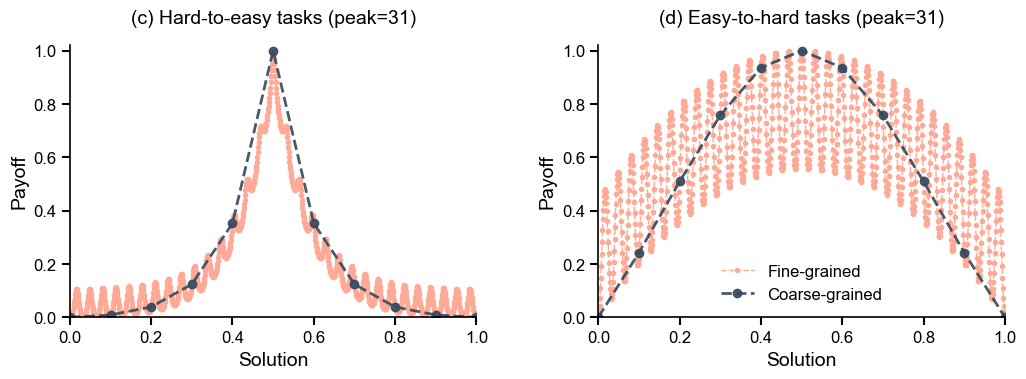

In [7]:
paras = {'font.size': 14, 'lines.linewidth': 1}
# sns.set(context='notebook', style='ticks', font='Arial', font_scale=1, rc=paras)
# ["#34495e" dark grey, "#9b59b6" blue, "#95a5a6" light grey, "#e74c3c" red, FFaa96 light green]

fig, axs = plt.subplots(1, 2, figsize=(11, 4), dpi=100)

p = 0
axs[p].plot(t2, h2e_w3_c5, '.--', color='#FFaa96', linewidth=1, label='Fine-grained')
axs[p].plot(t1, h2e_w1_c5, 'o--', color='#34495e', linewidth=2, alpha=0.9, label='Coarse-grained')
# axs[p].vlines(x=1000, ymin=0, ymax=1, colors='grey', alpha=0.5, linestyles='solid', linewidths=1.5)
axs[p].set_xlabel('Solution', fontsize=14, color='k')
axs[p].set_ylabel('Payoff', fontsize=14, color='k')
axs[p].set_xlim(0, 1)
axs[p].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
axs[p].set_ylim(0, 1.02)
axs[p].set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
axs[p].spines['bottom'].set_linewidth('1.2')
axs[p].spines['left'].set_linewidth('1.2')
axs[p].spines['top'].set_visible(False)
axs[p].spines['right'].set_visible(False)
# axs[0].grid(True, linestyle='-.')
axs[p].tick_params(labelcolor='k', labelsize='large', width=1.5, length=6)
axs[p].set_title('(c) Hard-to-easy tasks (peak=31)', fontsize=14, y=1.05)
# axs[p].legend(loc=1, fontsize='large', frameon=False)

p = 1
axs[p].plot(t2, e2h_w3_c5, '.--', color='#FFaa96', linewidth=1, label='Fine-grained')
axs[p].plot(t1, e2h_w1_c5, 'o--', color='#34495e', linewidth=2, alpha=0.9, label='Coarse-grained')
# axs[p].vlines(x=1000, ymin=0, ymax=1, colors='grey', alpha=0.5, linestyles='solid', linewidths=1.5)
axs[p].set_xlabel('Solution', fontsize=14, color='k')
axs[p].set_ylabel('Payoff', fontsize=14, color='k')
axs[p].set_xlim(0, 1)
axs[p].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
axs[p].set_ylim(0, 1.02)
axs[p].set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
axs[p].spines['bottom'].set_linewidth('1.2')
axs[p].spines['left'].set_linewidth('1.2')
axs[p].spines['top'].set_visible(False)
axs[p].spines['right'].set_visible(False)
# axs[0].grid(True, linestyle='-.')
axs[p].tick_params(labelcolor='k', labelsize='large', width=1.5, length=6)
axs[p].set_title('(d) Easy-to-hard tasks (peak=31)', fontsize=14, y=1.05)
axs[p].legend(loc=8, fontsize='large', frameon=False)

plt.subplots_adjust(left=0.1, right=0.95, bottom=0.2, wspace=0.3)
figname = save_path + '/main/Two_Tasks_Granularity.svg'
# plt.savefig(figname, dpi=300)
plt.show()

### Coarse-grained hard-to-easy tasks of different complexity

In [8]:
t1 = np.arange(0, 1.0001, 0.1)
t2 = np.arange(0, 1.0001, 0.001)
h2e_w1_c4 = task(t1, opt='Ackley', power=1, peak=15)
h2e_w3_c4 = task(t2, opt='Ackley', power=1, peak=15)
h2e_w1_c5 = task(t1, opt='Ackley', power=1, peak=31)
h2e_w3_c5 = task(t2, opt='Ackley', power=1, peak=31)

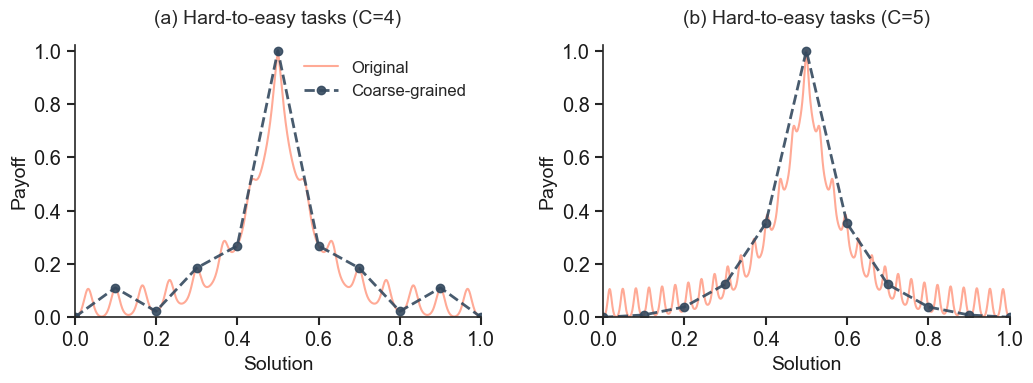

In [9]:
paras = {'font.size': 12, 'lines.linewidth': 1}
sns.set(context='notebook', style='ticks', font='Arial', font_scale=1, rc=paras)
# ["#34495e" dark grey, "#9b59b6" blue, "#95a5a6" light grey, "#e74c3c" red, FFaa96 light green]

fig, axs = plt.subplots(1, 2, figsize=(11, 4), dpi=100)

p = 0
axs[p].plot(t2, h2e_w3_c4, '-', color='#FFaa96', linewidth=1.5, label='Original')
axs[p].plot(t1, h2e_w1_c4, 'o--', color='#34495e', linewidth=2, alpha=0.9, label='Coarse-grained')
# axs[p].vlines(x=1000, ymin=0, ymax=1, colors='grey', alpha=0.5, linestyles='solid', linewidths=1.5)
axs[p].set_xlabel('Solution', fontsize=14, color='k')
axs[p].set_ylabel('Payoff', fontsize=14, color='k')
axs[p].set_xlim(0, 1)
axs[p].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
axs[p].set_ylim(0, 1.02)
axs[p].set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
axs[p].spines['bottom'].set_linewidth('1.2')
axs[p].spines['left'].set_linewidth('1.2')
axs[p].spines['top'].set_visible(False)
axs[p].spines['right'].set_visible(False)
# axs[0].grid(True, linestyle='-.')
axs[p].tick_params(labelcolor='k', labelsize='large', width=1.5, length=6)
axs[p].set_title('(a) Hard-to-easy tasks (C=4)', fontsize=14, y=1.05)
axs[p].legend(loc=1, fontsize='medium', frameon=False)

p = 1
axs[p].plot(t2, h2e_w3_c5, '-', color='#FFaa96', linewidth=1.5, label='Original')
axs[p].plot(t1, h2e_w1_c5, 'o--', color='#34495e', linewidth=2, alpha=0.9, label='Coarse-grained')
# axs[p].vlines(x=1000, ymin=0, ymax=1, colors='grey', alpha=0.5, linestyles='solid', linewidths=1.5)
axs[p].set_xlabel('Solution', fontsize=14, color='k')
axs[p].set_ylabel('Payoff', fontsize=14, color='k')
axs[p].set_xlim(0, 1)
axs[p].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
axs[p].set_ylim(0, 1.02)
axs[p].set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
axs[p].spines['bottom'].set_linewidth('1.2')
axs[p].spines['left'].set_linewidth('1.2')
axs[p].spines['top'].set_visible(False)
axs[p].spines['right'].set_visible(False)
# axs[0].grid(True, linestyle='-.')
axs[p].tick_params(labelcolor='k', labelsize='large', width=1.5, length=6)
axs[p].set_title('(b) Hard-to-easy tasks (C=5)', fontsize=14, y=1.05)
# axs[p].legend(loc=2, fontsize='large', frameon=False)

plt.subplots_adjust(left=0.1, right=0.95, bottom=0.2, wspace=0.3)
figname = save_path + '/supp/H2E_Tasks_Complexity2.png'
# plt.savefig(figname, dpi=300)
plt.show()

### Coarse-grained easy-to-hard tasks of different complexity 

In [10]:
t1 = np.arange(0, 1.0001, 0.1)
t2 = np.arange(0, 1.0001, 0.001)
e2h_w1_c4 = task(t1, opt='Rastrigin', power=1, peak=15)
e2h_w3_c4 = task(t2, opt='Rastrigin', power=1, peak=15)
e2h_w1_c5 = task(t1, opt='Rastrigin', power=1, peak=31)
e2h_w3_c5 = task(t2, opt='Rastrigin', power=1, peak=31)

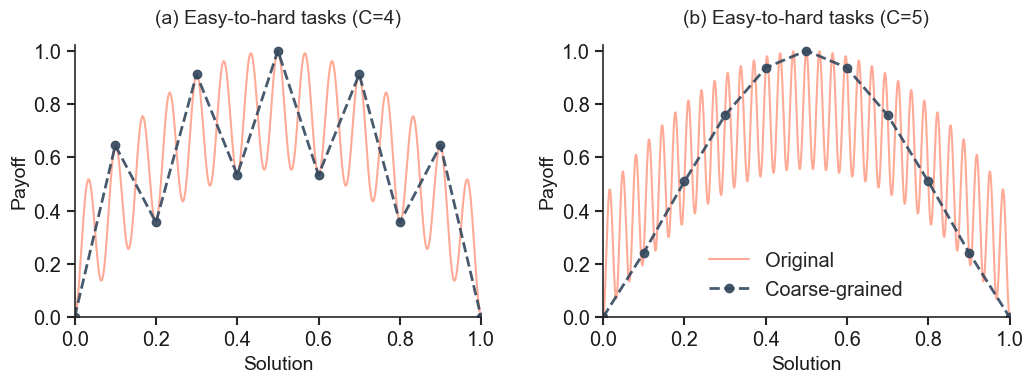

In [11]:
paras = {'font.size': 14, 'lines.linewidth': 1}
# sns.set(context='notebook', style='ticks', font='Arial', font_scale=1, rc=paras)
# ["#34495e" dark grey, "#9b59b6" blue, "#95a5a6" light grey, "#e74c3c" red, FFaa96 light green]

fig, axs = plt.subplots(1, 2, figsize=(11, 4), dpi=100)

p = 0
axs[p].plot(t2, e2h_w3_c4, '-', color='#FFaa96', linewidth=1.5, label='Original')
axs[p].plot(t1, e2h_w1_c4, 'o--', color='#34495e', linewidth=2, alpha=0.9, label='Coarse-grained')
# axs[p].vlines(x=1000, ymin=0, ymax=1, colors='grey', alpha=0.5, linestyles='solid', linewidths=1.5)
axs[p].set_xlabel('Solution', fontsize=14, color='k')
axs[p].set_ylabel('Payoff', fontsize=14, color='k')
axs[p].set_xlim(0, 1)
axs[p].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
axs[p].set_ylim(0, 1.02)
axs[p].set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
axs[p].spines['bottom'].set_linewidth('1.2')
axs[p].spines['left'].set_linewidth('1.2')
axs[p].spines['top'].set_visible(False)
axs[p].spines['right'].set_visible(False)
# axs[0].grid(True, linestyle='-.')
axs[p].tick_params(labelcolor='k', labelsize='large', width=1.5, length=6)
axs[p].set_title('(a) Easy-to-hard tasks (C=4)', fontsize=14, y=1.05)
# axs[p].legend(loc=1, fontsize='large', frameon=False)

p = 1
axs[p].plot(t2, e2h_w3_c5, '-', color='#FFaa96', linewidth=1.5, label='Original')
axs[p].plot(t1, e2h_w1_c5, 'o--', color='#34495e', linewidth=2, alpha=0.9, label='Coarse-grained')
# axs[p].vlines(x=1000, ymin=0, ymax=1, colors='grey', alpha=0.5, linestyles='solid', linewidths=1.5)
axs[p].set_xlabel('Solution', fontsize=14, color='k')
axs[p].set_ylabel('Payoff', fontsize=14, color='k')
axs[p].set_xlim(0, 1)
axs[p].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
axs[p].set_ylim(0, 1.02)
axs[p].set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
axs[p].spines['bottom'].set_linewidth('1.2')
axs[p].spines['left'].set_linewidth('1.2')
axs[p].spines['top'].set_visible(False)
axs[p].spines['right'].set_visible(False)
# axs[0].grid(True, linestyle='-.')
axs[p].tick_params(labelcolor='k', labelsize='large', width=1.5, length=6)
axs[p].set_title('(b) Easy-to-hard tasks (C=5)', fontsize=14, y=1.05)
axs[p].legend(loc=8, fontsize='large', frameon=False)

plt.subplots_adjust(left=0.1, right=0.95, bottom=0.2, wspace=0.3)
figname = save_path + '/supp/E2H_Tasks_Complexity2.svg'
# plt.savefig(figname, dpi=300)
plt.show()

## Main results

### Task features

In [12]:
all_df = pd.read_csv('./results/main/main_simulation_data.csv')

In [13]:
len(all_df)

75600

In [14]:
all_df.head(5)

,Type,Complexity,Granularity,Strategy,Proportion,Init_Performance,Final_Performance
0,Hard-to-easy,1,1,Best,10,0.1927,0.9395
1,Hard-to-easy,1,1,Conformity,10,0.1927,0.9395
2,Hard-to-easy,1,1,Random,10,0.1927,0.9395
3,Hard-to-easy,1,1,Best,10,0.2236,0.9424
4,Hard-to-easy,1,1,Conformity,10,0.2236,0.9450


#### Hard-to-easy tasks

In [15]:
h2e_df = all_df[all_df['Type'].isin(['Hard-to-easy']) & all_df['Proportion'].isin([50])]    # Hard-to-easy

In [16]:
h2e_gra_df = h2e_df[h2e_df['Granularity'].isin([1, 10])]
h2e_gra_df['Granularity'].replace({1: r'(a) Coarse-grained ($\omega$=1)', 10: r'(b) Fine-grained ($\omega$=10)'}, inplace=True)

C:\software\anaconda3\envs\torch10\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


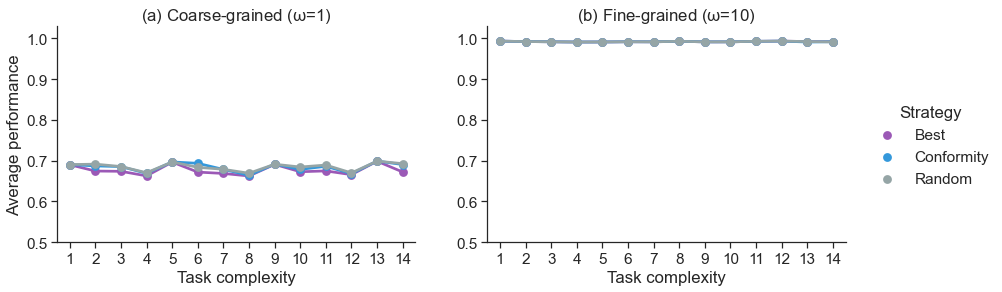

In [17]:
paras = {'font.size': 16, 'lines.linewidth': 1.5}
sns.set(context='notebook', style='ticks', font='Arial', font_scale=1.4, rc=paras)
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e"]

g = sns.catplot(x="Complexity", y='Final_Performance', hue="Strategy", col="Granularity", data=h2e_gra_df,
                 kind="point", palette=flatui, sharey=False, sharex=False, ci=None, 
                 orient='v', legend_out=True, height=4, aspect=1.6)
g.set_axis_labels("Task complexity", "Average performance")
g.set_titles("{col_name}")
g.set(ylim=(0.5, 1.03), xticklabels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])   # set y axis limitation, set xtick labels

plt.subplots_adjust(left=0.1, bottom=0.15, right=0.85, top=0.9, wspace=0.2)
photo = save_path + '/main/H2E_Complexity_Granularity1.svg'
# plt.savefig(photo, dpi=360)
plt.show()

In [18]:
h2e_comp_df = h2e_df[h2e_df['Proportion'].isin([50])]
h2e_comp_df['Complexity'].replace({1: '(c) Low complexity', 2: '(c) Low complexity', 3: '(c) Low complexity', 4: '(c) Low complexity', 5: '(c) Low complexity', 
                                 6: '(d) Medium complexity', 7: '(d) Medium complexity', 8: '(d) Medium complexity', 9: '(d) Medium complexity', 10: '(d) Medium complexity',
                                 11: '(e) High complexity', 12: '(e) High complexity', 13: '(e) High complexity', 14: '(e) High complexity',}, inplace=True)

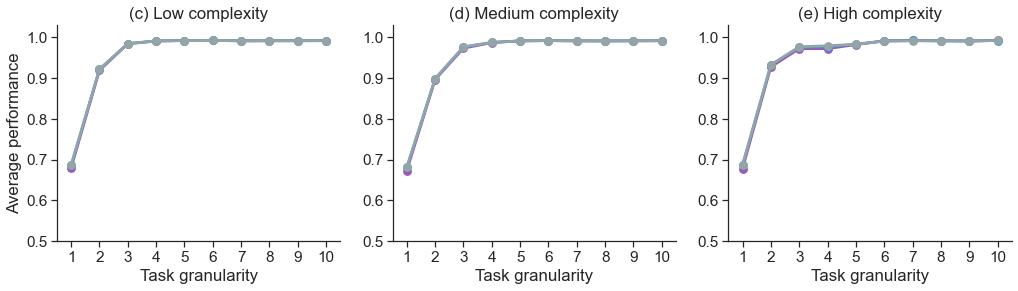

In [20]:
paras = {'font.size': 16, 'lines.linewidth': 1.5}
sns.set(context='notebook', style='ticks', font='Arial', font_scale=1.4, rc=paras)
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e"]

g = sns.catplot(x="Granularity", y='Final_Performance', hue="Strategy", col="Complexity", data=h2e_comp_df,
                 kind="point", palette=flatui, sharey=False, sharex=False, ci=None,
                 orient='v', legend=False, height=4, aspect=1.3)
g.set_axis_labels("Task granularity", "Average performance")
g.set_titles("{col_name}")
g.set(ylim=(0.5, 1.03), xticklabels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])   # set y axis limitation, set xtick labels

plt.subplots_adjust(left=0.1, bottom=0.15, right=0.95, top=0.9)
photo = save_path + '/main/H2E_Complexity_Granularity2.svg'
# plt.savefig(photo, dpi=360)
plt.show()

#### Easy-to-hard tasks

In [21]:
e2h_df = all_df[all_df['Type'].isin(['Easy-to-hard']) & all_df['Proportion'].isin([50])]    # Easy-to-hard

In [22]:
e2h_gra_df = e2h_df[e2h_df['Granularity'].isin([1, 10])]
e2h_gra_df['Granularity'].replace({1: r'(a) Coarse-grained ($\omega$=1)', 10: r'(b) Fine-grained ($\omega$=10)'}, inplace=True)

C:\software\anaconda3\envs\torch10\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


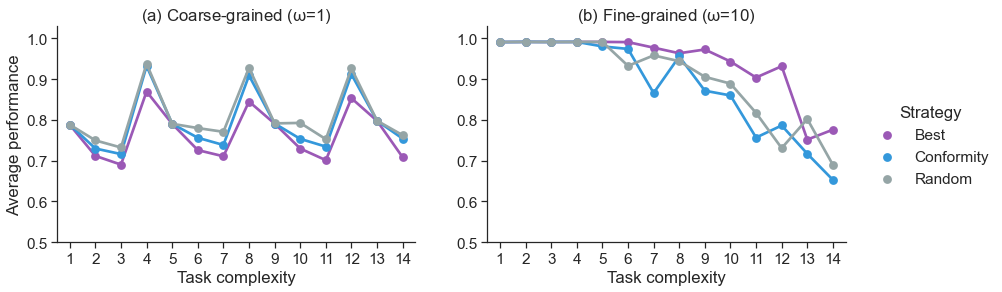

In [23]:
paras = {'font.size': 16, 'lines.linewidth': 1.5}
sns.set(context='notebook', style='ticks', font='Arial', font_scale=1.4, rc=paras)
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e"]

g = sns.catplot(x="Complexity", y='Final_Performance', hue="Strategy", col="Granularity", data=e2h_gra_df,
                 kind="point", palette=flatui, sharey=False, sharex=False, ci=None, 
                 orient='v', legend_out=True, height=4, aspect=1.6)
g.set_axis_labels("Task complexity", "Average performance")
g.set_titles("{col_name}")
g.set(ylim=(0.5, 1.03), xticklabels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])   # set y axis limitation, set xtick labels

plt.subplots_adjust(left=0.1, bottom=0.15, right=0.85, top=0.9, wspace=0.2)
photo = save_path + '/main/E2H_Complexity_Granularity1.svg'
# plt.savefig(photo, dpi=360)
plt.show()

In [24]:
e2h_comp_df = e2h_df[e2h_df['Proportion'].isin([50])]
e2h_comp_df['Complexity'].replace({1: '(c) Low complexity', 2: '(c) Low complexity', 3: '(c) Low complexity', 4: '(c) Low complexity', 5: '(c) Low complexity', 
                                 6: '(d) Medium complexity', 7: '(d) Medium complexity', 8: '(d) Medium complexity', 9: '(d) Medium complexity', 10: '(d) Medium complexity',
                                 11: '(e) High complexity', 12: '(e) High complexity', 13: '(e) High complexity', 14: '(e) High complexity',}, inplace=True)

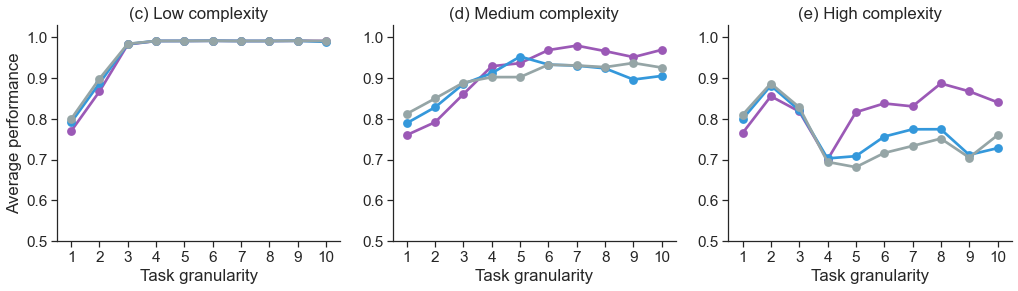

In [25]:
paras = {'font.size': 16, 'lines.linewidth': 1.5}
sns.set(context='notebook', style='ticks', font='Arial', font_scale=1.4, rc=paras)
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e"]

g = sns.catplot(x="Granularity", y='Final_Performance', hue="Strategy", col="Complexity", data=e2h_comp_df,
                 kind="point", palette=flatui, sharey=False, sharex=False, ci=None,
                 orient='v', legend=False, height=4, aspect=1.3)
g.set_axis_labels("Task granularity", "Average performance")
g.set_titles("{col_name}")
g.set(ylim=(0.5, 1.03), xticklabels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])   # set y axis limitation, set xtick labels

plt.subplots_adjust(left=0.1, bottom=0.15, right=0.95, top=0.9)
photo = save_path + '/main/E2H_Complexity_Granularity2.svg'
# plt.savefig(photo, dpi=360)
plt.show()

### SQB distribution

In [26]:
sqb_dist_df = all_df[all_df['Proportion'].isin([10, 20, 30, 40, 50, 60, 70, 80, 90]) & all_df['Granularity'].isin([1, 2, 3]) & all_df['Complexity'].isin([1, 2, 3, 4, 5])]
sqb_dist_df = sqb_dist_df[sqb_dist_df['Strategy'].isin(['Best'])]
sqb_dist_df['Granularity'].replace({1: r'$\omega$=1', 2:  r'$\omega$=2', 3:  r'$\omega$=3'}, inplace=True)
sqb_dist_df['Type'].replace({'Hard-to-easy': '(a) Hard-to-easy', 'Easy-to-hard':  '(b) Easy-to-hard'}, inplace=True)
# sqb_dist_df['Granularity']

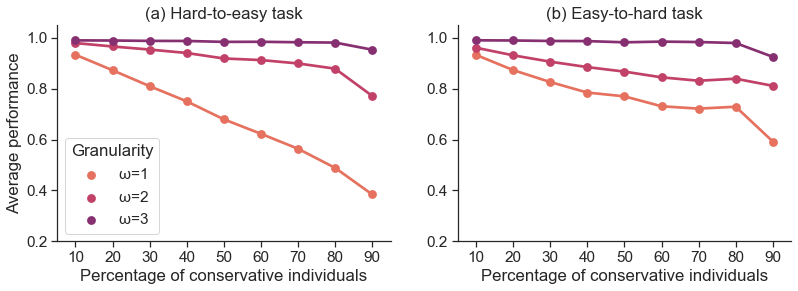

In [27]:
paras = {'font.size': 16, 'lines.linewidth': 1.5}
sns.set(context='notebook', style='ticks', font='Arial', font_scale=1.4, rc=paras)

flatui = ["#34495e", "#9b59b6", "#95a5a6", "#e74c3c", "#3498db"]
ax = sns.catplot(x="Proportion", y='Final_Performance', hue="Granularity", col="Type", data=sqb_dist_df,  
                 kind="point", sharey=False, sharex=False, ci=None, palette='flare',     # cividis  rocket_r  flare  ch:s=-.5,rot=-.3  vlag
                 orient='v', legend_out=False, height=4, aspect=1.5)
ax.set_axis_labels("Percentage of conservative individuals", "Average performance")
ax.set_titles("{col_name} task") # (w={row_name})
ax.set(ylim=(0.2, 1.05))

plt.subplots_adjust(left=0.1, bottom=0.15, right=0.95, top=0.9, wspace=0.2)
photo = save_path + '/main/SQB_Distribution_Granularity.svg'
# plt.savefig(photo, dpi=360)
plt.show()

### Open and conservative individuals

In [28]:
open_con_df = pd.read_csv('./results/main/sqb_open_conservative.csv')

In [29]:
open_con_df['Task'].replace({'Hard-to-easy': '(a) Hard-to-easy', 'Easy-to-hard':  '(b) Easy-to-hard'}, inplace=True)
open_con_df

,Unnamed: 0,Task,Granularity,Complexity,Trial,Individual,Performance
0,0,(a) Hard-to-easy,1,1,0,Open,1.000000
1,1,(a) Hard-to-easy,1,1,0,Conservative,0.357090
2,2,(a) Hard-to-easy,1,1,1,Open,1.000000
3,3,(a) Hard-to-easy,1,1,1,Conservative,0.368700
4,4,(a) Hard-to-easy,1,1,2,Open,1.000000
...,...,...,...,...,...,...,...
5595,5595,(b) Easy-to-hard,10,14,7,Conservative,0.618856
5596,5596,(b) Easy-to-hard,10,14,8,Open,0.986078
5597,5597,(b) Easy-to-hard,10,14,8,Conservative,0.772202
5598,5598,(b) Easy-to-hard,10,14,9,Open,1.000000


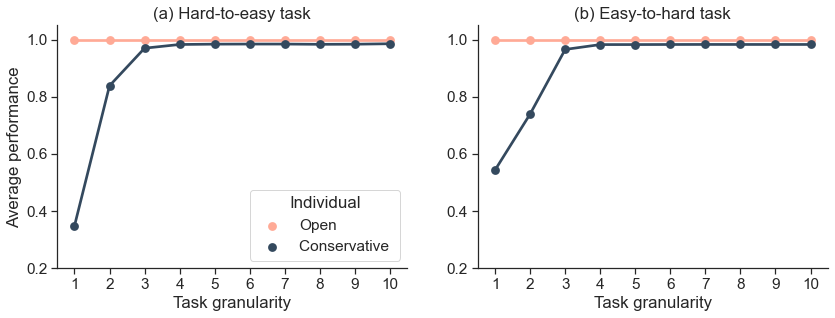

In [30]:
paras = {'font.size': 16, 'lines.linewidth': 1.5}
sns.set(context='notebook', style='ticks', font='Arial', font_scale=1.4, rc=paras)
flatui = ["#FFaa96", "#34495e", "#3498db", "#95a5a6", "#e74c3c", "#34495e"] #  "#95a5a6", " #9b59b6 "#FFCC00"

open_con_df = open_con_df[open_con_df['Complexity'].isin([1,2,3,4,5])] # 1,2,3,4,5,6,7,8,9,10,11,12,13,14
g = sns.catplot(x="Granularity", y='Performance', hue="Individual", col='Task', data=open_con_df,
                 kind="point", palette=flatui, sharey=False, sharex=False, ci=None,
                 orient='v', legend_out=False, height=4.5, aspect=1.4)
g.set_axis_labels("Task granularity", "Average performance")
g.set_titles("{col_name} task") #  (low complexity)
g.set(ylim=(0.2, 1.05), xticklabels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])   # set y axis limitation, set xtick labels

plt.subplots_adjust(left=0.1, bottom=0.15, right=0.95, top=0.9, wspace=0.2)
photo = save_path + '/main/Open_Con_Granularity.svg'
# plt.savefig(photo, dpi=360)
plt.show()

## CART

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn import tree
import pandas as pd
import seaborn as sns
import numpy as np
import graphviz  
import pydotplus

In [32]:
data = pd.read_csv('./results/main/main_simulation_data.csv')

In [33]:
data

,Type,Complexity,Granularity,Strategy,Proportion,Init_Performance,Final_Performance
0,Hard-to-easy,1,1,Best,10,0.192700,0.939500
1,Hard-to-easy,1,1,Conformity,10,0.192700,0.939500
2,Hard-to-easy,1,1,Random,10,0.192700,0.939500
3,Hard-to-easy,1,1,Best,10,0.223600,0.942400
4,Hard-to-easy,1,1,Conformity,10,0.223600,0.945000
...,...,...,...,...,...,...,...
75595,Easy-to-hard,14,10,Conformity,90,0.163208,0.552734
75596,Easy-to-hard,14,10,Random,90,0.163208,0.516113
75597,Easy-to-hard,14,10,Best,90,0.101624,0.626953
75598,Easy-to-hard,14,10,Conformity,90,0.101624,0.511230


### Data processing

In [34]:
data.rename(columns={'Proportion': 'SQB', 'Final_Performance': 'Performance'}, inplace=True)
data['Type'].replace({'Hard-to-easy': 0, 'Easy-to-hard': 1}, inplace=True)
# data['Strategy'].replace({'Best': 'B', 'Conformity': 'C', 'Random': 'R'}, inplace=True)

In [35]:
strategy_dummy = pd.get_dummies(data['Strategy'])

In [36]:
strategy_dummy

,Best,Conformity,Random
0,1,0,0
1,0,1,0
2,0,0,1
3,1,0,0
4,0,1,0
...,...,...,...
75595,0,1,0
75596,0,0,1
75597,1,0,0
75598,0,1,0


In [37]:
data_pro = pd.concat([data, strategy_dummy], axis=1)
data_pro

,Type,Complexity,Granularity,Strategy,SQB,Init_Performance,Performance,Best,Conformity,Random
0,0,1,1,Best,10,0.192700,0.939500,1,0,0
1,0,1,1,Conformity,10,0.192700,0.939500,0,1,0
2,0,1,1,Random,10,0.192700,0.939500,0,0,1
3,0,1,1,Best,10,0.223600,0.942400,1,0,0
4,0,1,1,Conformity,10,0.223600,0.945000,0,1,0
...,...,...,...,...,...,...,...,...,...,...
75595,1,14,10,Conformity,90,0.163208,0.552734,0,1,0
75596,1,14,10,Random,90,0.163208,0.516113,0,0,1
75597,1,14,10,Best,90,0.101624,0.626953,1,0,0
75598,1,14,10,Conformity,90,0.101624,0.511230,0,1,0


In [38]:
data_pro.drop(['Strategy'], axis=1, inplace=True)
data_pro

,Type,Complexity,Granularity,SQB,Init_Performance,Performance,Best,Conformity,Random
0,0,1,1,10,0.192700,0.939500,1,0,0
1,0,1,1,10,0.192700,0.939500,0,1,0
2,0,1,1,10,0.192700,0.939500,0,0,1
3,0,1,1,10,0.223600,0.942400,1,0,0
4,0,1,1,10,0.223600,0.945000,0,1,0
...,...,...,...,...,...,...,...,...,...
75595,1,14,10,90,0.163208,0.552734,0,1,0
75596,1,14,10,90,0.163208,0.516113,0,0,1
75597,1,14,10,90,0.101624,0.626953,1,0,0
75598,1,14,10,90,0.101624,0.511230,0,1,0


### Model training

In [39]:
X = data_pro[['Type', 'Complexity', 'Granularity', 'SQB', 'Best', 'Conformity', 'Random']]
y = data_pro['Performance']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24, shuffle=True)

In [41]:
%%time
# CART model
results = []
for deep in range(1, 11):
    clf = tree.DecisionTreeRegressor(max_depth=deep)
    clf = clf.fit(X_train, y_train)
    # train_score = clf.score(X, y)
    
    # train error
    y_train_pred = clf.predict(X_train)
    mse_train = mean_squared_error(y_train, y_train_pred, squared=True)
    rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
    
    # test error
    y_test_pred = clf.predict(X_test)
    rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
    mse_test = mean_squared_error(y_test, y_test_pred, squared=True)
    results.append([deep, mse_train, rmse_train, mse_test, rmse_test])

CPU times: total: 719 ms
Wall time: 741 ms


In [42]:
cart_df = pd.DataFrame(results, columns=['Depth', 'Train_MSE', 'Train_rMSE', 'Test_MSE', 'Test_rMSE'])
cart_df

,Depth,Train_MSE,Train_rMSE,Test_MSE,Test_rMSE
0,1,0.014006,0.118345,0.013847,0.117674
1,2,0.011360,0.106584,0.011195,0.105806
2,3,0.008031,0.089613,0.008043,0.089682
3,4,0.006663,0.081625,0.006754,0.082185
4,5,0.005894,0.076775,0.005989,0.077390
5,6,0.005276,0.072636,0.005417,0.073603
6,7,0.004873,0.069805,0.005014,0.070808
7,8,0.004470,0.066861,0.004606,0.067868
8,9,0.004059,0.063707,0.004203,0.064830
9,10,0.003797,0.061621,0.003979,0.063079


In [44]:
cart_df.to_csv('./results/main/cart_results.csv', index=False)

In [45]:
%%time
# RandomForest model
from sklearn.ensemble import RandomForestRegressor

results = []
for deep in range(1, 5):
    clf = RandomForestRegressor(max_depth=deep)
    clf = clf.fit(X_train, y_train)
    # train_score = clf.score(X, y)
    
    # train error
    y_train_pred = clf.predict(X_train)
    mse_train = mean_squared_error(y_train, y_train_pred, squared=True)
    rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
    
    # test error
    y_test_pred = clf.predict(X_test)
    rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
    mse_test = mean_squared_error(y_test, y_test_pred, squared=True)
    results.append([deep, mse_train, rmse_train, mse_test, rmse_test])

CPU times: total: 11.8 s
Wall time: 12 s


In [46]:
rf_df = pd.DataFrame(results, columns=['Depth', 'Train_MSE', 'Train_rMSE', 'Test_MSE', 'Test_rMSE'])
rf_df

,Depth,Train_MSE,Train_rMSE,Test_MSE,Test_rMSE
0,1,0.014006,0.118345,0.013847,0.117673
1,2,0.011253,0.106081,0.011087,0.105295
2,3,0.007974,0.089295,0.007984,0.089356
3,4,0.006561,0.081002,0.006634,0.081450


In [47]:
rf_df.to_csv('./results/main/randomforest_results.csv', index=False)

### Model Visualization (depth=4)

In [43]:
clf = tree.DecisionTreeRegressor(max_depth=4)
clf = clf.fit(X_train, y_train)

In [44]:
y_test_pred = clf.predict(X_test)
mean_squared_error(y_test, y_test_pred, squared=False)

0.08218490765102816

In [45]:
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=['Type', 'Complexity', 'Granularity', 'SQB', 'Best', 'Conformity', 'Random'], 
                                filled=True, rounded=True)   # 'Type', 'SQB'
graph = graphviz.Source(dot_data, format='png')

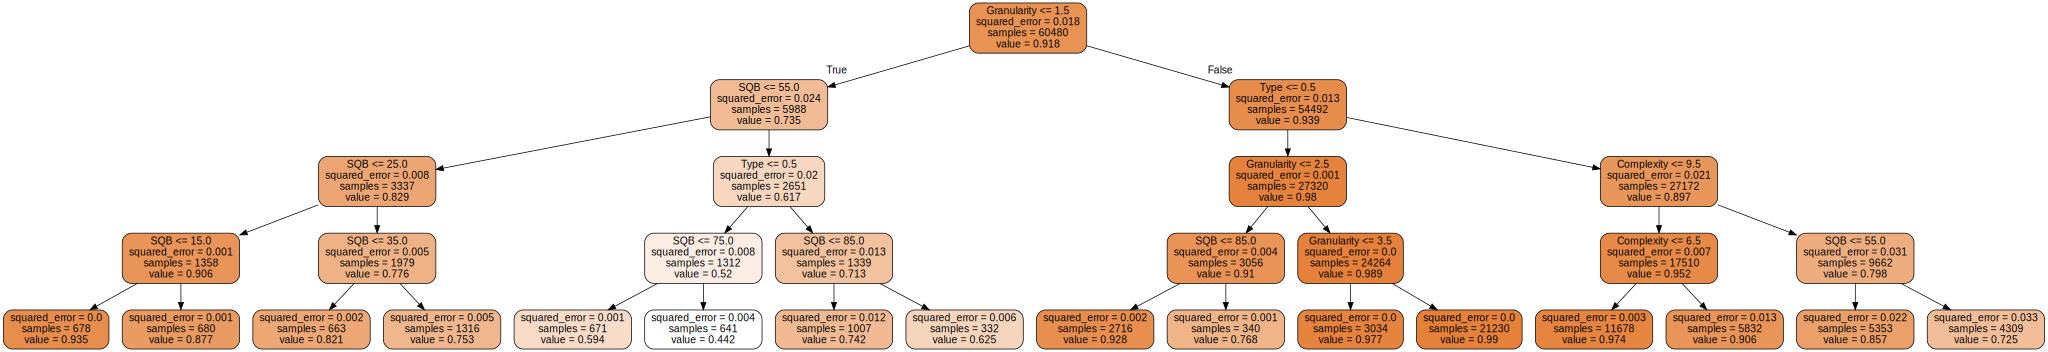

In [36]:
graph

In [37]:
graph.render("./figs/main/Decision_tree_4depth")

'./figs/main\\Decision_tree_4depth.png'

In [46]:
clf.feature_importances_   # ['Type', 'Complexity', 'Granularity', 'SQB', 'Best', 'Conformity', 'Random']

array([0.17768681, 0.24691428, 0.36047428, 0.21492464, 0.        ,
       0.        , 0.        ])

In [39]:
feat_importance = [0.17768681, 0.24691428, 0.36047428, 0.21492464, 0]    # clf.feature_importances_
feat_name = ['Task type', 'Task complexity', 'Task granularity', 'Group conservativeness', 'Social learning strategy']
feat_list = []
for i in range(len(feat_name)):
    feat_list.append([feat_name[i], feat_importance[i]])

print(feat_list)

[['Task type', 0.17768681], ['Task complexity', 0.24691428], ['Task granularity', 0.36047428], ['Group conservativeness', 0.21492464], ['Social learning strategy', 0]]


In [40]:
feat_df = pd.DataFrame(feat_list, columns=['feature', 'score'])
feat_df = feat_df.sort_values("score", ascending=False)

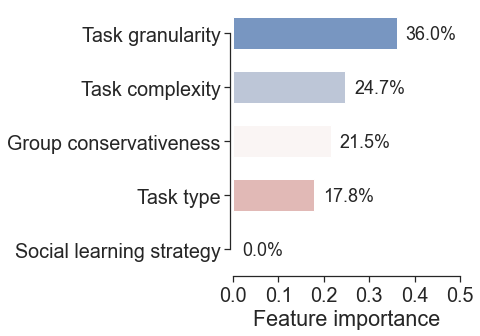

In [83]:
paras = {'font.size': 20, 'lines.linewidth': 3}
sns.set(context='notebook', style='ticks', font='Arial', font_scale=1.8, rc=paras)
f, ax = plt.subplots(figsize=(7, 5))
g = sns.barplot(x="score", y="feature", data=feat_df, palette="vlag", saturation=1, ax=ax)  # color="salmon",  {'width': 0.6}
ax.set(xlim=(0, 0.5), ylim=(4.5, -0.5), yticks=[0, 1, 2, 3, 4], ylabel="", xlabel="Feature importance")   # # Add a legend and informative axis label
for bar in g.patches:
    new_width = 0.6
    y = bar.get_y()
    width = bar.get_height() 
    centre = y+width/2. 
    bar.set_y(centre-new_width/2.) 
    bar.set_height(new_width)
    g.annotate(format(round(bar.get_width(), 3)*100, '.1f')+'%', (bar.get_width()+0.02, bar.get_y()+0.4), size=18)
    
sns.despine(left=False, bottom=False, offset={'left': 3}, trim=True)
plt.subplots_adjust(left=0.5, bottom=0.15, right=0.95, top=0.9)
photo = './figs/main/Feature_importance.svg'
plt.savefig(photo, dpi=300)
plt.show()